# Importuoju Pandas ir Matplotlib bibliotekas ir užkraunu duomenis


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
duomenys = pd.read_csv('duomenys.csv', delimiter='\t')

# Apžiūriu duomenis

In [4]:
duomenys.head(5)

,ST Mokslo metai,ST Padalinio savivaldybės ID,ST Padalinio savivaldybė,ST Padalinio tipo ID,ST Padalinio tipas,ST Padalinio kodas,ST Padalinio pavadinimas,ST Finansavimo pobūdis ID,ST Finansavimo pobūdis,ST Studijų krypčių grupės kodas,ST Studijų krypčių grupė,ST Studijų krypties kodas,ST Studijų kryptis,ST Programos valstybinis kodas,ST Programa,ST Studijų pakopa ID,ST Studijų pakopa,ST Priimtų į I kursą skaičius,ST Studijuojančių studentų skaičius
0,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,B,Informatikos mokslai,B04,Informatikos inžinerija,6531BX001,Informacinės technologijos,11,Pirmosios pakopos studijos,11,23
1,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,B,Informatikos mokslai,B04,Informatikos inžinerija,6531BX039,Multimedija ir vizualinė komunikacija,11,Pirmosios pakopos studijos,7,17
2,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,E,Inžinerijos mokslai,E05,Statybos inžinerija,6531EX002,Statinių inžinerinės sistemos,11,Pirmosios pakopos studijos,10,28
3,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,E,Inžinerijos mokslai,E12,Transporto inžinerija,6531EX001,Automobilių transporto inžinerija,11,Pirmosios pakopos studijos,13,26
4,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,G,Sveikatos mokslai,G06,Reabilitacija,6531GX047,Kineziterapija,11,Pirmosios pakopos studijos,1,16


Pasitikrinu kokie duomenys ir jų tipai

In [5]:
duomenys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21401 entries, 0 to 21400
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ST Mokslo metai                      21401 non-null  object
 1   ST Padalinio savivaldybės ID         21401 non-null  int64 
 2   ST Padalinio savivaldybė             21401 non-null  object
 3   ST Padalinio tipo ID                 21401 non-null  int64 
 4   ST Padalinio tipas                   21401 non-null  object
 5   ST Padalinio kodas                   21401 non-null  int64 
 6   ST Padalinio pavadinimas             21401 non-null  object
 7   ST Finansavimo pobūdis ID            21401 non-null  int64 
 8   ST Finansavimo pobūdis               21401 non-null  object
 9   ST Studijų krypčių grupės kodas      21394 non-null  object
 10  ST Studijų krypčių grupė             21394 non-null  object
 11  ST Studijų krypties kodas            2137

# Duomenų tvarkymas

Sukuriu stulpelį 'Metai', kad gauti ne mokslo metų rėži, o mokslo metų pradžią

In [6]:
duomenys['metai'] = duomenys['ST Mokslo metai'].str.split('-').str[0].astype(int)

In [7]:
duomenys.head(2)

,ST Mokslo metai,ST Padalinio savivaldybės ID,ST Padalinio savivaldybė,ST Padalinio tipo ID,ST Padalinio tipas,ST Padalinio kodas,ST Padalinio pavadinimas,ST Finansavimo pobūdis ID,ST Finansavimo pobūdis,ST Studijų krypčių grupės kodas,ST Studijų krypčių grupė,ST Studijų krypties kodas,ST Studijų kryptis,ST Programos valstybinis kodas,ST Programa,ST Studijų pakopa ID,ST Studijų pakopa,ST Priimtų į I kursą skaičius,ST Studijuojančių studentų skaičius,metai
0,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,B,Informatikos mokslai,B04,Informatikos inžinerija,6531BX001,Informacinės technologijos,11,Pirmosios pakopos studijos,11,23,2023
1,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,B,Informatikos mokslai,B04,Informatikos inžinerija,6531BX039,Multimedija ir vizualinė komunikacija,11,Pirmosios pakopos studijos,7,17,2023


# 1.Kokios buvo 2023m. TOP 10 studijų kryptys, remiantis priimtų (į I kursą) į Universitetus studentų skaičių.

Apžiūriu duomenis

In [8]:
duomenys[['metai', 'ST Studijų kryptis', 'ST Priimtų į I kursą skaičius']].head(5)

,metai,ST Studijų kryptis,ST Priimtų į I kursą skaičius
0,2023,Informatikos inžinerija,11
1,2023,Informatikos inžinerija,7
2,2023,Statybos inžinerija,10
3,2023,Transporto inžinerija,13
4,2023,Reabilitacija,1


Sukuriu "countui" stulpelį, kad galėčiau atlikti skaičiavimus

In [9]:
duomenys['countui'] = 1
duomenys.head(2)

,ST Mokslo metai,ST Padalinio savivaldybės ID,ST Padalinio savivaldybė,ST Padalinio tipo ID,ST Padalinio tipas,ST Padalinio kodas,ST Padalinio pavadinimas,ST Finansavimo pobūdis ID,ST Finansavimo pobūdis,ST Studijų krypčių grupės kodas,...,ST Studijų krypties kodas,ST Studijų kryptis,ST Programos valstybinis kodas,ST Programa,ST Studijų pakopa ID,ST Studijų pakopa,ST Priimtų į I kursą skaičius,ST Studijuojančių studentų skaičius,metai,countui
0,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,B,...,B04,Informatikos inžinerija,6531BX001,Informacinės technologijos,11,Pirmosios pakopos studijos,11,23,2023,1
1,2023-2024,2,Alytaus m. sav.,3911,Kolegija,111965327,Alytaus kolegija,21,Valstybės finansuojami,B,...,B04,Informatikos inžinerija,6531BX039,Multimedija ir vizualinė komunikacija,11,Pirmosios pakopos studijos,7,17,2023,1


Išrūšiuoju ir sugrupuoju duomenis taip, kad gaučiau studijų kryptis ir studentų priimtų į pirmą kursą sumą, 2023 metais, Universitetuose. Susortinu rezultatus mazejimo tavrka ir išspausdinu 10. Taip gaunu top 10.


In [10]:
kryptys_2023 = duomenys.loc[(duomenys['metai'] == 2023) & (duomenys['ST Padalinio tipas']=='Universitetas')].groupby('ST Studijų kryptis')['ST Priimtų į I kursą skaičius'].sum().sort_values(ascending=False).head(10)
kryptys_2023

ST Studijų kryptis
Pedagogika                 1203
Vadyba                     1198
Medicina                   1196
Verslas                    1004
Teisė                       960
Komunikacija                866
Psichologija                735
Programų sistemos           659
Informatikos inžinerija     646
Informatika                 630
Name: ST Priimtų į I kursą skaičius, dtype: int64

Tam, kad gauciau grafiką, reikėjo gautą atsakymą pasiversti listu.

In [11]:
kryptys_2023 = dict(kryptys_2023)
kryptys_2023

{'Pedagogika': 1203,
 'Vadyba': 1198,
 'Medicina': 1196,
 'Verslas': 1004,
 'Teisė': 960,
 'Komunikacija': 866,
 'Psichologija': 735,
 'Programų sistemos': 659,
 'Informatikos inžinerija': 646,
 'Informatika': 630}

Grafiko gamyba

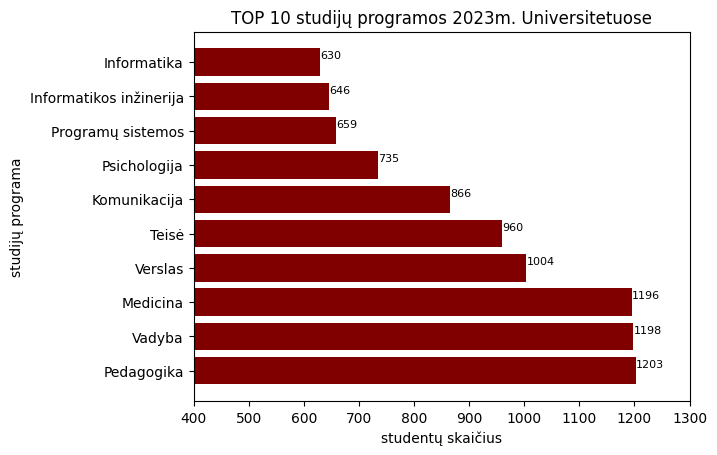

In [12]:
ax =plt.barh(list(kryptys_2023.keys()), list(kryptys_2023.values()), color='maroon')

plt.title('TOP 10 studijų programos 2023m. Universitetuose')
plt.xlabel('studentų skaičius')
plt.ylabel('studijų programa')
plt.xlim(400, 1300)


for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=8,
             color='black')

plt.show()

# 2.Kiek šiais metais buvo studentų priimtų (į I kursą) į valstybės finansuojamas vietas Universitetuose.

surušiuoju ir grupuoju duomenis, kad gaučiau atsakymą.


In [13]:
valstybes_finansuojami_uni_2023 = duomenys.loc[(duomenys['metai'] == 2023) & (duomenys['ST Padalinio tipas']== 'Universitetas')& (duomenys['ST Finansavimo pobūdis']== 'Valstybės finansuojami' )].groupby('ST Finansavimo pobūdis')['ST Priimtų į I kursą skaičius'].sum()
valstybes_finansuojami_uni_2023

ST Finansavimo pobūdis
Valstybės finansuojami    13390
Name: ST Priimtų į I kursą skaičius, dtype: int64

**2023m. valstybės finansuojamų studentų buvo: 13390**

# 3.Į kokią studijų kryptį Kolegijose 2023m. buvo priimta daugiausiai studentų? Koks šių studentų pasiskirstymas Vilniaus m. įstaigose?

Atžiūriu duomenis, kad žinočiau pagal ką rušiuoti

In [14]:
duomenys_vilnius = duomenys.loc[duomenys['ST Padalinio savivaldybė'] == 'Vilniaus m. sav.']
duomenys_vilnius.head(2)

,ST Mokslo metai,ST Padalinio savivaldybės ID,ST Padalinio savivaldybė,ST Padalinio tipo ID,ST Padalinio tipas,ST Padalinio kodas,ST Padalinio pavadinimas,ST Finansavimo pobūdis ID,ST Finansavimo pobūdis,ST Studijų krypčių grupės kodas,...,ST Studijų krypties kodas,ST Studijų kryptis,ST Programos valstybinis kodas,ST Programa,ST Studijų pakopa ID,ST Studijų pakopa,ST Priimtų į I kursą skaičius,ST Studijuojančių studentų skaičius,metai,countui
1401,2023-2024,461,Vilniaus m. sav.,3911,Kolegija,111961987,"""Tarptautinė teisės ir verslo aukštoji mokykla...",25,Mokantys uz mokslą,L,...,L03,Finansai,6531LX021,Finansai,11,Pirmosios pakopos studijos,0,24,2023,1
1402,2023-2024,461,Vilniaus m. sav.,3911,Kolegija,111961987,"""Tarptautinė teisės ir verslo aukštoji mokykla...",25,Mokantys uz mokslą,L,...,L08,Turizmas ir poilsis,6531LX024,Turizmo ir viešbučių verslas,11,Pirmosios pakopos studijos,0,15,2023,1


Grupuoju rušiuoju ir skaičiuoju sumą

In [15]:
kryptys_vln_kolegijos_2023 = duomenys_vilnius.loc[(duomenys_vilnius['metai'] == 2023) & (duomenys_vilnius['ST Padalinio tipas']== 'Kolegija')].groupby('ST Studijų kryptis')['ST Priimtų į I kursą skaičius'].sum().sort_values(ascending=False).head(1)
kryptys_vln_kolegijos_2023

ST Studijų kryptis
Verslas    738
Name: ST Priimtų į I kursą skaičius, dtype: int64

In [16]:
kryptys_vln_kolegijos_2023 = dict(kryptys_vln_kolegijos_2023)
kryptys_vln_kolegijos_2023

{'Verslas': 738}

**2023 m. Vilniaus Kolegijose daugiausiai studentų buvo priimta į Verslo studijų kryptį**

# 4.Įstaigų kiekis pagal miestus

Išsirenku unikalias reikšmes ir sugrupuoju į naujas grupes

In [17]:
duomenys['ST Padalinio savivaldybė'].unique()

array(['Alytaus m. sav.', 'Kauno m. sav.', 'Kauno r. sav.',
       'Klaipėdos m. sav.', 'Marijampolės sav.', 'Panevėžio m. sav.',
       'Šiaulių m. sav.', 'Tauragės r. sav.', 'Utenos r. sav.',
       'Vilniaus m. sav.', 'Telšių r. sav.', 'Druskininkų sav.'],
      dtype=object)

gaunu kiekvienos grupės countą, kiek istaigu turi kiekvienas miestas

In [20]:
duomenys.loc[duomenys['ST Padalinio savivaldybė'] == 'Vilniaus m. sav.']['ST Padalinio pavadinimas'].unique()

array(['"Tarptautinė teisės ir verslo aukštoji mokykla", UAB',
       'SMK Aukštosios mokyklos Vilniaus filialas',
       'Viešoji įstaiga Vilniaus verslo kolegija',
       'Viešosios įstaigos Lietuvos verslo kolegijos Vilniaus skyrius',
       'Vilniaus dizaino kolegija', 'Vilniaus kolegija',
       'Vilniaus technologijų ir dizaino kolegija',
       '"ISM Vadybos ir ekonomikos universitetas", UAB',
       '"KAZIMIERO SIMONAVIČIAUS UNIVERSITETAS", UAB',
       'Balstogės universiteto filialas "Ekonomikos-informatikos fakultetas"',
       'Generolo Jono Žemaičio Lietuvos karo akademija',
       'Lietuvos muzikos ir teatro akademija',
       'Mykolo Romerio universitetas',
       'Viešoji įstaiga "Europos Humanitarinis Universitetas"',
       'Vilniaus dailės akademija',
       'Vilniaus Gedimino technikos universitetas',
       'Vilniaus Šv. Juozapo kunigų seminarija', 'Vilniaus universitetas',
       'Viešosios įstaigos  Socialinių  mokslų  kolegijos Vilniaus  filialas',
       'Vilni

In [29]:
vilnius= duomenys.loc[duomenys['ST Padalinio savivaldybė'] == 'Vilniaus m. sav.']['ST Padalinio pavadinimas'].nunique()
kaunas=duomenys.loc[(duomenys['ST Padalinio savivaldybė'] == 'Kauno m. sav.') | (duomenys['ST Padalinio savivaldybė'] =='Kauno r. sav.')]['ST Padalinio pavadinimas'].nunique()
klaipeda= duomenys.loc[duomenys['ST Padalinio savivaldybė'] == 'Klaipėdos m. sav.']['ST Padalinio pavadinimas'].nunique()
kiti= duomenys.loc[(duomenys['ST Padalinio savivaldybė'] != 'Klaipėdos m. sav.') & (duomenys['ST Padalinio savivaldybė'] != 'Vilniaus m. sav.') & (duomenys['ST Padalinio savivaldybė'] == 'Kauno m. sav.')]['ST Padalinio pavadinimas'].nunique()

print('Vilniuje yra',vilnius,'įstaigos')
print('Kaune yra',kaunas,'įstaigų')
print('Klaipedoje yra',klaipeda,'įstaigos')
print('Kituose miestuose yra',kiti,'įstaigų')

Vilniuje yra 23 įstaigos
Kaune yra 17 įstaigų
Klaipedoje yra 7 įstaigos
Kituose miestuose yra 15 įstaigų


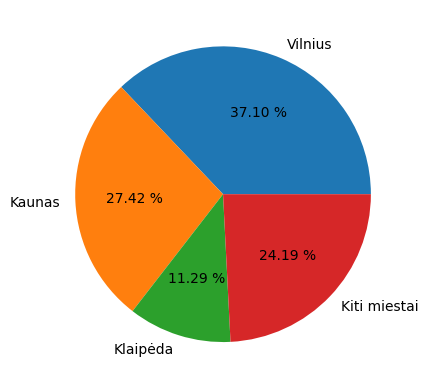

In [27]:
plt.pie([vilnius,kaunas,klaipeda,kiti], labels=['Vilnius', 'Kaunas', 'Klaipėda','Kiti miestai'], autopct='%.2f %%')
plt.show()

# 5. Kiek vidutiniškai studentų priimė VGTU ir VU 2023m.

In [74]:
duomenys_vilnius['ST Padalinio pavadinimas'].unique()

array(['"Tarptautinė teisės ir verslo aukštoji mokykla", UAB',
       'SMK Aukštosios mokyklos Vilniaus filialas',
       'Viešoji įstaiga Vilniaus verslo kolegija',
       'Viešosios įstaigos Lietuvos verslo kolegijos Vilniaus skyrius',
       'Vilniaus dizaino kolegija', 'Vilniaus kolegija',
       'Vilniaus technologijų ir dizaino kolegija',
       '"ISM Vadybos ir ekonomikos universitetas", UAB',
       '"KAZIMIERO SIMONAVIČIAUS UNIVERSITETAS", UAB',
       'Balstogės universiteto filialas "Ekonomikos-informatikos fakultetas"',
       'Generolo Jono Žemaičio Lietuvos karo akademija',
       'Lietuvos muzikos ir teatro akademija',
       'Mykolo Romerio universitetas',
       'Viešoji įstaiga "Europos Humanitarinis Universitetas"',
       'Vilniaus dailės akademija',
       'Vilniaus Gedimino technikos universitetas',
       'Vilniaus Šv. Juozapo kunigų seminarija', 'Vilniaus universitetas',
       'Viešosios įstaigos  Socialinių  mokslų  kolegijos Vilniaus  filialas',
       'Vilni

In [85]:
vidurkis_vgtu_2023 = round(duomenys_vilnius.loc[(duomenys_vilnius['metai']==2023)&(duomenys_vilnius['ST Priimtų į I kursą skaičius'] !=0) & (duomenys_vilnius['ST Studijų pakopa'] == 'Pirmosios pakopos studijos')& (duomenys_vilnius['ST Padalinio pavadinimas']=='Vilniaus Gedimino technikos universitetas')]['ST Priimtų į I kursą skaičius'].mean(),0)
print('2023 metais VGTU į pirmos pakopos kiekvieną studijų programą vidutiniškai priimė: ',vidurkis_vgtu_2023,'studentus')

2023 metais VGTU į pirmos pakopos kiekvieną studijų programą vidutiniškai priimė:  23.0 studentus


In [84]:
vidurkis_vu_2023 = round(duomenys_vilnius.loc[(duomenys_vilnius['metai']==2023)& (duomenys_vilnius['ST Priimtų į I kursą skaičius'] !=0) & (duomenys_vilnius['ST Studijų pakopa'] == 'Pirmosios pakopos studijos') & (duomenys_vilnius['ST Padalinio pavadinimas']=='Vilniaus universitetas')]['ST Priimtų į I kursą skaičius'].mean(),0)
print('2023 metais VU į pirmos pakopos kiekvieną studijų programą vidutiniškai priimė: ',vidurkis_vu_2023,'studentus')

2023 metais VU į pirmos pakopos kiekvieną studijų programą vidutiniškai priimė:  29.0 studentus
